In [2]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Open communication Correlation

In [21]:
%store -r open_communication
%store -r hospitals_personalInfo

In [4]:
open_communication

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
0,2,1,4
1,2,1,4
2,3,4,2
3,4,4,4
4,3,5,5
...,...,...,...
98,3,4,4
99,3,4,5
100,1,3,3
101,2,3,4


In [5]:
absolute_frequencies = open_communication.apply(lambda x: x.value_counts())
absolute_frequencies


,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1,15,3,2
2,24,7,12
3,37,20,28
4,17,42,32
5,10,31,29


<AxesSubplot:>

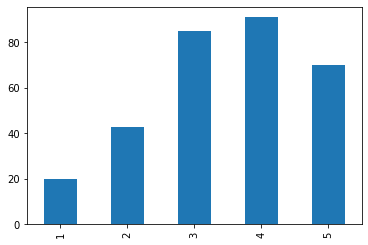

In [20]:
absolute_frequencies_sum = absolute_frequencies.sum(axis=1)
absolute_frequencies_sum.plot.bar()

In [7]:
relative_frequencies = open_communication.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1,0.145631,0.029126,0.019417
2,0.233010,0.067961,0.116505
3,0.359223,0.194175,0.271845
4,0.165049,0.407767,0.310680
5,0.097087,0.300971,0.281553


In [8]:
positive_answers = relative_frequencies.iloc[3:6].sum().sum()/3
positive_answers

0.5210355987055015

In [88]:
open_communication.describe()

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
count,103.000000,103.000000,103.000000
mean,2.834951,3.883495,3.718447
std,1.163978,1.012674,1.061053
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


### Gender correlation

In [89]:
T1 = hospitals_personalInfo['1. Φύλο: ']

In [90]:
T2 = open_communication.sum(axis=1)/3


In [91]:
df = pd.concat([T1,T2],axis=1)

df.columns = ['Gender','Score']

In [92]:
df

,Gender,Score
0,Γυναίκα,2.333333
1,Γυναίκα,2.333333
2,Άνδρας,3.000000
3,Άνδρας,4.000000
4,Άνδρας,4.333333
...,...,...
98,Γυναίκα,3.666667
99,Γυναίκα,4.000000
100,Γυναίκα,2.333333
101,Γυναίκα,3.000000


### Education Correlation

In [122]:
T1 = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']
s = pd.concat([T1,T2],axis=1)

s.columns = ['Education','Score']

In [126]:
s.groupby('Education')['Score'].mean()

Education
1. Δευτεροβάθμια (Δ.Ε.)     3.611111
2. Τεχνολογική (Τ.Ε.)       3.551724
3. Πανεπιστημιακή (Π.Ε.)    3.388889
Name: Score, dtype: float64

In [127]:
s

,Education,Score
0,3. Πανεπιστημιακή (Π.Ε.),2.333333
1,3. Πανεπιστημιακή (Π.Ε.),2.333333
2,2. Τεχνολογική (Τ.Ε.),3.000000
3,3. Πανεπιστημιακή (Π.Ε.),4.000000
4,2. Τεχνολογική (Τ.Ε.),4.333333
...,...,...
98,3. Πανεπιστημιακή (Π.Ε.),3.666667
99,3. Πανεπιστημιακή (Π.Ε.),4.000000
100,1. Δευτεροβάθμια (Δ.Ε.),2.333333
101,2. Τεχνολογική (Τ.Ε.),3.000000


In [125]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Score ~ Education', data=s).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Education,0.672580,2.0,0.453802,0.63655
Residual,71.881865,97.0,NaN,NaN


### Profession

In [138]:
T1 = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']
s = pd.concat([T1,T2],axis=1)

s.columns = ['Education','Score']

In [139]:
s

,Education,Score
0,4. ΤΕ Νοσηλευτής,2.333333
1,4. ΤΕ Νοσηλευτής,2.333333
2,4. ΤΕ Νοσηλευτής,3.000000
3,NaN,4.000000
4,4. ΤΕ Νοσηλευτής,4.333333
...,...,...
98,2. Ειδικός ιατρός,3.666667
99,3. ΠΕ Νοσηλευτής,4.000000
100,5. ΔΕ Βοηθός Νοσηλευτή,2.333333
101,4. ΤΕ Νοσηλευτής,3.000000


In [140]:
s = s.dropna()


In [141]:
s

,Education,Score
0,4. ΤΕ Νοσηλευτής,2.333333
1,4. ΤΕ Νοσηλευτής,2.333333
2,4. ΤΕ Νοσηλευτής,3.000000
4,4. ΤΕ Νοσηλευτής,4.333333
5,2. Ειδικός ιατρός,3.666667
...,...,...
98,2. Ειδικός ιατρός,3.666667
99,3. ΠΕ Νοσηλευτής,4.000000
100,5. ΔΕ Βοηθός Νοσηλευτή,2.333333
101,4. ΤΕ Νοσηλευτής,3.000000


In [142]:
s.groupby('Education')['Score'].mean()

Education
1. Ειδικευόμενος ιατρός    3.351852
2. Ειδικός ιατρός          3.500000
3. ΠΕ Νοσηλευτής           3.611111
4. ΤΕ Νοσηλευτής           3.549708
5. ΔΕ Βοηθός Νοσηλευτή     3.291667
Name: Score, dtype: float64

In [143]:


model = ols('Score ~ Education', data=s).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
Education,0.950182,4.0,0.30911,0.871242
Residual,72.237248,94.0,NaN,NaN
